<h2>Predicting Digits with KNN</h2>

Esse é um exercicio ensinado pela escola:
<a href = 'https://www.datascienceacademy.com.br/'>Data Science Academy</a>

O objetivo é realizar uma classificação multiclasse usando o algoritmo KNN (K Nearest Neighbor) baseado nas dez imagens de digitos mostradas abaixo. O dataset está disponível no pacote scikit learn, também pode ser acessado pelo endereço: <a href = 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits'>https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits</a>

Os dados referentes aos digitos estão armazenados em formato matricial, pois, uma imagem é uma matriz de pixels, nesse caso cada digito possui dimensão de 8x8 px, totalizando uma área de 64 pixels. Esses pixels são posicionados em formato de vetor (1 dimensão), por esse fato o dataset, possui 64 features/atributos/colunas.

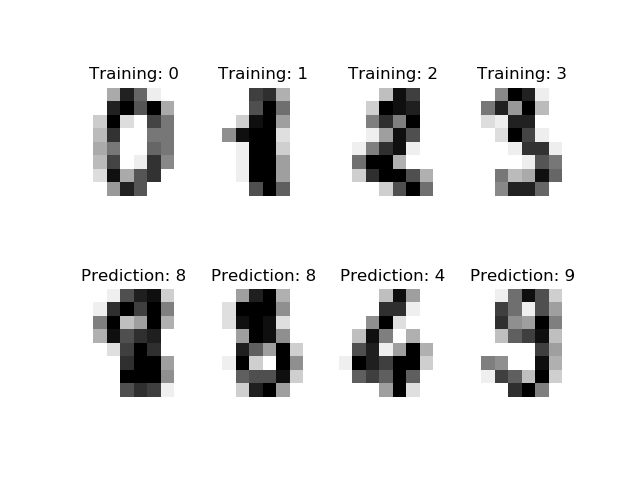

In [1]:
from IPython.display import Image
Image('imagens/digitos.png')

Loading and exploring the dataset

In [68]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
digitos = datasets.load_digits()

In [10]:
type(digitos)

sklearn.utils.Bunch

In [72]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

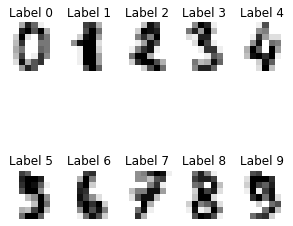

In [66]:
images_e_labels = list(zip(digitos.images, digitos.target))
for indice, (image, label) in enumerate(images_e_labels[:10]):
    plt.subplot(2,5, indice + 1)
    plt.axis('off')
    plt.imshow(image, cmap= plt.cm.gray_r)
    plt.title(f'Label {label}')
    

In [67]:
# Separando variáveis explanatória e variável target
X = digitos.data
y = digitos.target

<h4>Aplicando Normalização nos Dados</h4>

In [69]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

Realizando a divisão, dados de treino, dados de teste, dados de validação

A divisão será de 70, 20, 10